In [15]:
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [16]:
all_files = glob.glob("./data_list2/my*.xls")
all_files

['./data_list2\\myCabinetExcelData (1).xls',
 './data_list2\\myCabinetExcelData (2).xls',
 './data_list2\\myCabinetExcelData (3).xls',
 './data_list2\\myCabinetExcelData (4).xls',
 './data_list2\\myCabinetExcelData.xls']

In [17]:
all_files_data = []

In [18]:
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
    
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Inside out : An interior full of pent-up energ...,unknown,unknown,1983
1,NaN,2,Carpet manufacturers and the interior designer...,"Wilson, Frances",unknown,1972
2,NaN,3,"Crest hotel, Preston / Interior designer : Gly...","Smith, Glynn",unknown,1975
3,NaN,4,"European HQ offices, Manchester / Interior des...","Brenner, Jon",unknown,1976
4,NaN,5,Two demonstration centres / Interior designer ...,"Symonds, James",unknown,1976
...,...,...,...,...,...,...
95,NaN,96,Deconstructing Service-Learning: A Framework f...,"Zollinger, S. W.; Guerin, D. A.; Hadjiyanni, T...",BLACKWELL PUBLISHING LIMITED,2009
96,NaN,97,The Social Dimension of Security: Exploring Ho...,"Hadjiyanni, T.; Kwon, J.",BLACKWELL PUBLISHING LIMITED,2009
97,NaN,98,A Single Interior Design Professional Associat...,"Kucko, J.; Turpin, J. C.; Pable, J.",BLACKWELL PUBLISHING LIMITED,2009
98,NaN,99,Kho Liang le associates industiral design in t...,unknown,International Textiles,1983


In [19]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Inside out : An interior full of pent-up energ...,unknown,unknown,1983
1,NaN,2,Carpet manufacturers and the interior designer...,"Wilson, Frances",unknown,1972
2,NaN,3,"Crest hotel, Preston / Interior designer : Gly...","Smith, Glynn",unknown,1975
3,NaN,4,"European HQ offices, Manchester / Interior des...","Brenner, Jon",unknown,1976
4,NaN,5,Two demonstration centres / Interior designer ...,"Symonds, James",unknown,1976
...,...,...,...,...,...,...
452,NaN,96,"Tyttenhanger house, Herts / Interior Design : ...","Spence, Sir Basil",unknown,1974
453,NaN,97,"Flat, Kensington / Interior designer : Susanne...","Garry, Susanne",unknown,1975
454,NaN,98,Interior design international review,unknown,unknown,1983
455,NaN,99,"Debenham's health club, London / Interior desi...",unknown,unknown,1975


In [20]:
all_title = all_files_data_concat['제목']
all_title

0      Inside out : An interior full of pent-up energ...
1      Carpet manufacturers and the interior designer...
2      Crest hotel, Preston / Interior designer : Gly...
3      European HQ offices, Manchester / Interior des...
4      Two demonstration centres / Interior designer ...
                             ...                        
452    Tyttenhanger house, Herts / Interior Design : ...
453    Flat, Kensington / Interior designer : Susanne...
454                 Interior design international review
455    Debenham's health club, London / Interior desi...
456    Interior Design Identity in the Crossfire: A C...
Name: 제목, Length: 457, dtype: object

In [21]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [22]:
words = []

In [24]:
for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))
    
    EnWordsToken = word_tokenize(EnWords.lower())
    
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    
    words.append(EnWordsTokenStopLemma)

In [27]:
words

[['inside', 'interior', 'full', 'pent', 'energy', 'thrusting', 'way', 'bui'],
 ['carpet', 'manufacturer', 'interior', 'designer', 'france', 'wilson'],
 ['crest', 'hotel', 'preston', 'interior', 'designer', 'glynn', 'smithl'],
 ['european',
  'hq',
  'office',
  'manchester',
  'interior',
  'designer',
  'jon',
  'brenner'],
 ['two',
  'demonstration',
  'centre',
  'interior',
  'designer',
  'james',
  'symonds'],
 ['albuquerque', 'interior', 'la', 'luz'],
 ['interior',
  'design',
  'nd',
  'place',
  'fringe',
  'benefit',
  'financial',
  'service',
  'company',
  'corporate',
  'headquarters',
  'sq',
  'ft'],
 ['credit',
  'lyonnais',
  'interior',
  'view',
  'whinney',
  'son',
  'austen',
  'hall',
  'new',
  'building',
  'f'],
 ['interior', 'design', 'st', 'place', 'insertion'],
 ['four', 'ansells', 'pub', 'interior', 'designer', 'ansells', 'section'],
 ['international', 'interior', 'design', 'congress'],
 ['interior', 'landscaping', 'big', 'beautiful'],
 ['reflection',
  '

In [26]:
words2 = list(reduce(lambda x,y: x+y,words))
words2

['inside',
 'interior',
 'full',
 'pent',
 'energy',
 'thrusting',
 'way',
 'bui',
 'carpet',
 'manufacturer',
 'interior',
 'designer',
 'france',
 'wilson',
 'crest',
 'hotel',
 'preston',
 'interior',
 'designer',
 'glynn',
 'smithl',
 'european',
 'hq',
 'office',
 'manchester',
 'interior',
 'designer',
 'jon',
 'brenner',
 'two',
 'demonstration',
 'centre',
 'interior',
 'designer',
 'james',
 'symonds',
 'albuquerque',
 'interior',
 'la',
 'luz',
 'interior',
 'design',
 'nd',
 'place',
 'fringe',
 'benefit',
 'financial',
 'service',
 'company',
 'corporate',
 'headquarters',
 'sq',
 'ft',
 'credit',
 'lyonnais',
 'interior',
 'view',
 'whinney',
 'son',
 'austen',
 'hall',
 'new',
 'building',
 'f',
 'interior',
 'design',
 'st',
 'place',
 'insertion',
 'four',
 'ansells',
 'pub',
 'interior',
 'designer',
 'ansells',
 'section',
 'international',
 'interior',
 'design',
 'congress',
 'interior',
 'landscaping',
 'big',
 'beautiful',
 'reflection',
 'three',
 'adman',
 'desc

In [31]:
count = Counter(words2)

count

Counter({'inside': 4,
         'interior': 411,
         'full': 1,
         'pent': 1,
         'energy': 1,
         'thrusting': 1,
         'way': 2,
         'bui': 1,
         'carpet': 1,
         'manufacturer': 1,
         'designer': 71,
         'france': 3,
         'wilson': 1,
         'crest': 1,
         'hotel': 11,
         'preston': 1,
         'glynn': 4,
         'smithl': 1,
         'european': 1,
         'hq': 4,
         'office': 16,
         'manchester': 2,
         'jon': 1,
         'brenner': 1,
         'two': 4,
         'demonstration': 1,
         'centre': 3,
         'james': 1,
         'symonds': 3,
         'albuquerque': 1,
         'la': 2,
         'luz': 1,
         'design': 176,
         'nd': 1,
         'place': 6,
         'fringe': 1,
         'benefit': 1,
         'financial': 1,
         'service': 8,
         'company': 5,
         'corporate': 1,
         'headquarters': 2,
         'sq': 1,
         'ft': 1,
         'credit': 1

In [37]:
count.most_common(20)

[('interior', 411),
 ('design', 176),
 ('designer', 71),
 ('mbti', 57),
 ('student', 25),
 ('london', 23),
 ('space', 23),
 ('education', 22),
 ('type', 21),
 ('new', 19),
 ('study', 17),
 ('office', 16),
 ('international', 16),
 ('experience', 15),
 ('implication', 14),
 ('exploring', 14),
 ('structure', 14),
 ('project', 13),
 ('modern', 13),
 ('home', 13)]

In [82]:
word_count = dict()

for tag, counts  in count.most_common(40):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

interior : 411
design : 176
designer : 71
mbti : 57
student : 25
london : 23
space : 23
education : 22
type : 21
new : 19
study : 17
office : 16
international : 16
experience : 15
implication : 14
exploring : 14
structure : 14
project : 13
modern : 13
home : 13
house : 12
history : 12
environment : 12
learning : 12
hotel : 11
personality : 10
practice : 10
preference : 10
effect : 10
process : 9
practitioner : 9
style : 9
architecture : 9
social : 9
research : 9
using : 9
service : 8
award : 8
creative : 8
development : 8


In [83]:
del word_count['interior']
del word_count['mbti']
del word_count['design']
del word_count['student']
del word_count['london']
del word_count['designer']

word_count

{'space': 23,
 'education': 22,
 'type': 21,
 'new': 19,
 'study': 17,
 'office': 16,
 'international': 16,
 'experience': 15,
 'implication': 14,
 'exploring': 14,
 'structure': 14,
 'project': 13,
 'modern': 13,
 'home': 13,
 'house': 12,
 'history': 12,
 'environment': 12,
 'learning': 12,
 'hotel': 11,
 'personality': 10,
 'practice': 10,
 'preference': 10,
 'effect': 10,
 'process': 9,
 'practitioner': 9,
 'style': 9,
 'architecture': 9,
 'social': 9,
 'research': 9,
 'using': 9,
 'service': 8,
 'award': 8,
 'creative': 8,
 'development': 8}

In [84]:
word_count.keys()

dict_keys(['space', 'education', 'type', 'new', 'study', 'office', 'international', 'experience', 'implication', 'exploring', 'structure', 'project', 'modern', 'home', 'house', 'history', 'environment', 'learning', 'hotel', 'personality', 'practice', 'preference', 'effect', 'process', 'practitioner', 'style', 'architecture', 'social', 'research', 'using', 'service', 'award', 'creative', 'development'])

In [85]:
word_count.values()

dict_values([23, 22, 21, 19, 17, 16, 16, 15, 14, 14, 14, 13, 13, 13, 12, 12, 12, 12, 11, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8])

In [86]:
sorted_values = sorted(word_count.values(), reverse=True)
sorted_values

[23,
 22,
 21,
 19,
 17,
 16,
 16,
 15,
 14,
 14,
 14,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 11,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8]

In [87]:
sorted_keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_keys

['space',
 'education',
 'type',
 'new',
 'study',
 'office',
 'international',
 'experience',
 'implication',
 'exploring',
 'structure',
 'project',
 'modern',
 'home',
 'house',
 'history',
 'environment',
 'learning',
 'hotel',
 'personality',
 'practice',
 'preference',
 'effect',
 'process',
 'practitioner',
 'style',
 'architecture',
 'social',
 'research',
 'using',
 'service',
 'award',
 'creative',
 'development']

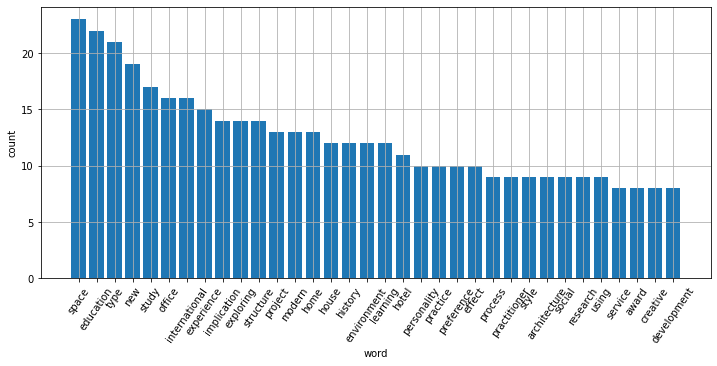

In [90]:
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

plt.bar(range(len(sorted_values)), sorted_values)

plt.xticks(range(len(sorted_keys)), sorted_keys, rotation='55')

plt.show()

In [ ]:
e